## Final Project Submission

Please fill out:
* Student name: Gabriel Araujo
* Student pace: part time
* Scheduled project review date/time: 
* Instructor name: James Irving 
* Blog post URL:


In [1]:
#import pandas as pd
#import seaborn as sns
#from bs4 import BeautifulSoup
#import os
#import glob


In [2]:
#file_names = os.listdir('zippedData')
#file_names

In [3]:
#file_path = glob.glob('zippedData/*')
#file_path[0].split('\\')[-1]

In [4]:
#data_dict = {}
#for file in file_path:
    #key = file.split('\\')[-1]
    #try:
        #df = pd.read_csv(file)
    #except:
        #df = pd.read_csv(file,delimiter='\t',encoding= 'unicode_escape' )
    #data_dict[key] = df

In [5]:
#data_dict[file_names[-2]]

In [6]:
#imbd_dataset = {}
#rt_dataset = {}
#bom_dataset = {}
#tn_dataset = {}
#tmdb_dataset = {}
#for key,value in data_dict.items():
    #if key.split('.')[0] == 'imdb':
        #imbd_dataset[key] = value
    #elif key.split('.')[0] == 'rt':
        #rt_dataset[key] = value
    #elif key.split('.')[0] == 'bom':
        #bom_dataset[key] = value
    #elif key.split('.')[0] == 'tn':
        #tn_dataset[key] = value
    #elif key.split('.')[0] == 'tmdb':
        #tmdb_dataset[key] = value

In [7]:
#for key,value in imbd_dataset.items():
    #print(value.columns)

# IMPORTING

In [8]:
from bs4 import BeautifulSoup
import requests
import pandas as pd
import time
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

  # WEBSCRAPING TRIAL CODE

In [9]:
# #PAGE TO GET DATA FROM
# html_page = requests.get('https://www.themoviedb.org/movie/top-rated?page=143')
# soup = BeautifulSoup(html_page.content, 'html.parser')

In [10]:
# # GETTING SPECIFIC MOVIE URL TO EXTRACT THE DATA AND ADDING IT TO A LIST
# base_url = 'https://www.themoviedb.org/'
# movies_data = soup.find('section', id='media_results')
# movie_entries = movies_data.findAll('a', class_='image')
# movie_titles = []
# movie_pages = []

# #LINK CONSISTS OF BASE_URL LINK + MODIFIED MOVIE TITLE
# for entry in movie_entries:    
#     title = entry.get('title')
#     ext_1 = entry.get('href').split('/movie/')
#     ext_2 = title.replace(' ','-').replace('/','-')
#     url = base_url+'movie/'+ext_1[1]+'-'+ext_2
#     movie_titles.append(title)
#     movie_pages.append(url)

In [11]:
# movie_titles

In [12]:
# #TRIAL TO GET DATA FROM SPECIFIC PAGE
# html_page_2 = requests.get(movie_pages[15])
# soup_2 = BeautifulSoup(html_page_2.content, 'html.parser')

# #GETTING CAST INFORMATION
# html_page_3 = requests.get(movie_pages[15]+'/cast')
# soup_3 = BeautifulSoup(html_page_3.content, 'html.parser')
# print(movie_pages[15]+'/cast')

In [13]:
# # for i in list(range(0,20)):
#     html_page_2 = requests.get(movie_pages[i])
#     soup_2 = BeautifulSoup(html_page_2.content, 'html.parser')
#     html_page_3 = requests.get(movie_pages[i]+'/cast')
#     soup_3 = BeautifulSoup(html_page_3.content, 'html.parser')
    
#     #GETTING MOVIE TITLE
       
#     specific_movie_data_1 = soup_2.find('div', class_='single_column')
#     try:
#         title = specific_movie_data_1.find('h2').text.split('(')[0].strip()
#         print(title)
#     except:
#         title = None
#         print(title)
    
#     #GETTING RELEASE DATE
#     try:
#         release_date = specific_movie_data_1.find('span',class_='release').text.strip().split('(')[0]
#         print(release_date)
#     except:
#         release_date = None
#         print(release_date)
    
#     #GETTING GENRE LIST
#     try:
#         genre_list = []
#         for genre in specific_movie_data_1.find('span',class_='genres').findAll('a'):
#             genre_list.append(genre.text)
#         print(genre_list)
#     except:
#         genre_list = None
#         print(genre_list)
    
#     #GETTING LENGTH OF MOVIE
#     try:
#         run_time = specific_movie_data_1.find('span',class_='runtime').text.strip()
#         print(run_time)
#     except:
#         run_time = None
#         print(run_time)
        
#     #GETTING MOVIE CERTIFICATION
#     try:
#         certification = specific_movie_data_1.find('span',class_='certification').text.strip()
#         print(certification)
#     except:
#         certification = None
#         print(certification)
    
#     #GETTING AVERAGE MOVIE RATING
#     try:
#         user_score = specific_movie_data_1.find('div',class_='percent').find('span').get('class')[1].split('-r')[-1]
#         print(user_score)
#     except:
#         user_score = None
#         print(user_score)
    
#     #GETTING LANGUAGE, BUDGET, AND REVENUE FROM FACTS LEFT_COLUMN
#     specific_movie_data_2 = soup_2.find('section', class_='facts left_column')
#     for data in specific_movie_data_2.findAll('p'):
#         if data.text.split()[1] == 'Language':
#             original_language = data.text.split()[-1]
#             print(original_language)
            
#         #USED NESTED IF STATEMENTS BECAUSE SOME MOVIES DON'T HAVE BUDGET OR REVENUE DATA
#         elif data.text.split()[0] == 'Budget':
#             if data.text.split()[-1] == '-':
#                 movie_budget = None
#                 print(movie_budget)
#             else:
#                 movie_budget = int(data.text.split()[-1].strip('$').replace(',','').replace('.00',''))
#                 print(movie_budget)
#         elif data.text.split()[0] == 'Revenue':
#             if data.text.split()[-1] == '-':
#                 movie_revenue = None
#                 print(movie_revenue)
#             else:        
#                 movie_revenue = int(data.text.split()[-1].strip('$').replace(',','').replace('.00',''))
#                 print(movie_revenue)
                
#     #GETTING MOVIE KEYWORDS
#     specific_movie_data_3 = soup_2.find('section',class_='keywords right_column')
#     keyword_list = []
#     for keyword in specific_movie_data_3.findAll('a'):
#         keyword_list.append(keyword.text)
#     print(keyword_list)
    
#     #GETTING LIST OF ACTORS
#     specific_movie_data_4 = soup_2.find('ol',class_='people scroller')
#     actors_list = []
#     #USED TRY BECAUSE SOME PAGES ARE MISSING ACTORS DATA
#     try:
#         for actor in specific_movie_data_4.findAll('p'):
#             if actor.find('a') != None:
#                 if actor.find('a').text != 'View More ':
#                     actors_list.append(actor.find('a').text)
#         print(actors_list)
#     except:
#         actors_list.append(None)
#         print(actors_list)
        
#      #GETTING DIRECTOR'S NAME
#     try:
#         specific_movie_data_5 = soup_3.findAll('section',class_='panel pad')[1]
#         #print(specific_movie_data_5)
#         count = 0
#         crew_list = []
#         director_list = []
#         for crew_member in specific_movie_data_5.findAll('p'):
#             count += 1
#             crew_list.append(crew_member)
#             if crew_member.text.strip() == 'Director':
#                 director_position = count-2
#                 director = crew_list[director_position].text
#                 director_list.append(director)
#         print(director_list)
#         print('\n')
#     except:
#         director_list = None
#         print(director_list)
# #writer = crew_list[writer_position].text
# #print(writer)
# #visual_prod = crew_list[visual_position].text
# #print(visual_prod)

# WEBSCRAPPING FUNCTIONS

In [14]:
#FUNCTION TO RETRIEVE URL FOR THE NEXT PAGE
def next_page(base_url):
    next_page_num = int(base_url.split('=')[-1]) +1
    base_url = base_url.split('=')[0] + '='+ str(next_page_num)
    return(base_url)

In [15]:
#TESTING FUNCTION
next_page('https://www.themoviedb.org/movie/top-rated?page=1')

'https://www.themoviedb.org/movie/top-rated?page=2'

In [16]:
#Function to Scrape all of the Movies on the Given Movies Page
def scrape_movies_list(base_url):
    html_page = requests.get(base_url)
    soup = BeautifulSoup(html_page.content, 'html.parser')
    base_movie_url = 'https://www.themoviedb.org/'
    movies_data = soup.find('section', id='media_results')
    movie_entries = movies_data.findAll('a', class_='image')
    movie_titles = []
    movie_pages = []
    df_list = []
    for entry in movie_entries:    
        title = entry.get('title')
        ext_1 = entry.get('href').split('/movie/')
        ext_2 = title.replace(' ','-').replace('/','-')
        url = base_movie_url+'movie/'+ext_1[1]+'-'+ext_2
        movie_titles.append(title)
        movie_pages.append(url)
    for movie in movie_pages:
        time.sleep(.2)
        html_page_2 = requests.get(movie)
        soup_2 = BeautifulSoup(html_page_2.content, 'html.parser')
        html_page_3 = requests.get(movie+'/cast')
        soup_3 = BeautifulSoup(html_page_3.content, 'html.parser')
        specific_movie_data_1 = soup_2.find('div', class_='single_column')
        title = specific_movie_data_1.find('h2').text.split('(')[0].strip()
        
        #GETTING MOVIE TITLE
        specific_movie_data_1 = soup_2.find('div', class_='single_column')
        try:
            title = specific_movie_data_1.find('h2').text.split('(')[0].strip()
            
        except:
            title = None
            
        #GETTING RELEASE DATE
        try:
            release_date = specific_movie_data_1.find('span',class_='release').text.strip().split('(')[0]
            
        except:
            release_date = None            

        #GETTING GENRE LIST
        try:
            genre_list = []
            for genre in specific_movie_data_1.find('span',class_='genres').findAll('a'):
                genre_list.append(genre.text)
            
        except:
            genre_list = None
            
        #GETTING LENGTH OF MOVIE
        try:
            run_time = specific_movie_data_1.find('span',class_='runtime').text.strip()
            
        except:
            run_time = None
            
        #GETTING MOVIE CERTIFICATION
        try:
            certification = specific_movie_data_1.find('span',class_='certification').text.strip()
        
        except:
            certification = None
            
        #GETTING AVERAGE MOVIE RATING
        try:
            user_score = specific_movie_data_1.find('div',class_='percent').find('span').get('class')[1].split('-r')[-1]
            
        except:
            user_score = None
            
        #GETTING LANGUAGE, BUDGET, AND REVENUE FROM FACTS LEFT_COLUMN
        specific_movie_data_2 = soup_2.find('section', class_='facts left_column')
        for data in specific_movie_data_2.findAll('p'):
            if data.text.split()[1] == 'Language':
                original_language = data.text.split()[-1]
                
            #USED NESTED IF STATEMENTS BECAUSE SOME MOVIES DON'T HAVE BUDGET OR REVENUE DATA
            elif data.text.split()[0] == 'Budget':
                if data.text.split()[-1] == '-':
                    movie_budget = None
                    
                else:
                    movie_budget = int(data.text.split()[-1].strip('$').replace(',','').replace('.00',''))
                    
            elif data.text.split()[0] == 'Revenue':
                if data.text.split()[-1] == '-':
                    movie_revenue = None
                    
                else:        
                    movie_revenue = int(data.text.split()[-1].strip('$').replace(',','').replace('.00',''))
                    
        #GETTING MOVIE KEYWORDS
        specific_movie_data_3 = soup_2.find('section',class_='keywords right_column')
        keyword_list = []
        for keyword in specific_movie_data_3.findAll('a'):
            keyword_list.append(keyword.text)
        

        #GETTING LIST OF ACTORS
        specific_movie_data_4 = soup_2.find('ol',class_='people scroller')
        actors_list = []
        #USED TRY BECAUSE SOME PAGES ARE MISSING ACTORS DATA
        try:
            for actor in specific_movie_data_4.findAll('p'):
                if actor.find('a') != None:
                    if actor.find('a').text != 'View More ':
                        actors_list.append(actor.find('a').text)
            
        except:
            actors_list.append(None)
            

         #GETTING DIRECTOR'S NAME
        try:
            specific_movie_data_5 = soup_3.findAll('section',class_='panel pad')[1]
            #print(specific_movie_data_5)
            count = 0
            crew_list = []
            director_list = []
            for crew_member in specific_movie_data_5.findAll('p'):
                count += 1
                crew_list.append(crew_member)
                if crew_member.text.strip() == 'Director':
                    director_position = count-2
                    director = crew_list[director_position].text
                    director_list.append(director)
            
        except:
            director_list = None
            
        #MAKING THE DATAFRAME
        df = pd.DataFrame([title,release_date,genre_list,run_time,certification,user_score,original_language,movie_budget,movie_revenue,keyword_list,actors_list,director_list]).transpose()
        df.columns = ['title','release_date','genre','run_time','certification','user_score','original_language','movie_budget','movie_revenue','keywords','actors','director_list']
        df_list.append(df)
        df = pd.concat(df_list)
    return(df)

In [76]:
#TESTING SCRAPE_MOVIES_LIST FUNCTION
test_df = scrape_movies_list('https://www.themoviedb.org/movie/top-rated?page=143')
test_df['genre'].iloc[0][0]

'Romance'

In [18]:
# #COMBINING NEXT_PAGE AND SCRAPE_MOVIES_LIST FUNCTIONS TO GATHER MOVIE INFO FROM WHOLE WEBSITE
# i = 0 
# lists_df = []
# base_url = 'https://www.themoviedb.org/movie/top-rated?page=0'
# while i <= 290:
#     base_url = next_page(base_url)
#     df = scrape_movies_list(base_url)
#     i += 1
#     lists_df.append(df)
#     df = pd.concat(lists_df)
#     print(i)
#     time.sleep(.2)
# df    

In [19]:
#SAVING DATAFRAME!
# df.to_csv('tmdb_webscraping.csv')

# ANALIZING THE DATA

In [20]:
df = pd.read_csv('tmdb_webscraping.csv')
df.head()

,Unnamed: 0,title,release_date,genre,run_time,certification,user_score,original_language,movie_budget,movie_revenue,keywords,actors,director_list
0,0,Dilwale Dulhania Le Jayenge,10/20/1995,"['Comedy', 'Drama', 'Romance']",3h 10m,U,88,Hindi,13200000.0,100000000.0,[],"['Shah Rukh Khan', 'Kajol', 'Amrish Puri', 'An...",['Aditya Chopra']
1,0,The Shawshank Redemption,10/14/1994,"['Drama', 'Crime']",2h 22m,R,87,English,25000000.0,28341469.0,"['prison', 'corruption', 'police brutality', '...","['Tim Robbins', 'Morgan Freeman', 'Bob Gunton'...",['Frank Darabont']
2,0,The Godfather,03/15/1972,"['Drama', 'Crime']",2h 55m,R,87,English,6000000.0,245066411.0,"['italy', 'loss of loved one', 'love at first ...","['Marlon Brando', 'Al Pacino', 'James Caan', '...",['Francis Ford Coppola']
3,0,Schindler's List,02/04/1994,"['Drama', 'History', 'War']",3h 15m,R,86,English,22000000.0,321365567.0,"['based on novel or book', 'factory', 'concent...","['Liam Neeson', 'Ben Kingsley', 'Ralph Fiennes...",['Steven Spielberg']
4,0,Your Name.,08/26/2016,"['Romance', 'Animation', 'Drama']",1h 46m,PG,86,Japanese,NaN,357986087.0,"['time travel', 'supernatural', 'afterlife', '...","['Ryunosuke Kamiki', 'Mone Kamishiraishi', 'Ma...",['Makoto Shinkai']


In [21]:
#FUNCTION TO CONVERT RUN_TIME FROM HOURS,MINUTES FORMAT TO MINUTES
def convert_run_time(test):
    if test is None:
        return 0
    else:
        try:
            hours = int(test.strip().split('h')[0])*60
        except:
            hours = 0
        try:
            minutes = int(test.split('h')[1].split('m')[0])
        except:
            minutes = 0
        run_time_min = hours + minutes
        
        return run_time_min

In [22]:
#CONVERTING NUMBER COLUMNS FROM STR TO FLOAT AND RENAMING CERTIFICATION COLUMN TO RATING
df['movie_budget'] = df['movie_budget'].astype(float)
df['movie_revenue'] = df['movie_revenue'].astype(float)
df['user_score'] = df['user_score'].astype(float)
df.rename(columns={'certification':'rating'}, inplace=True)

In [23]:
#RUNNING RUN_TIME FUNCTION
df['run_time'] = df['run_time'].map(convert_run_time)

In [24]:
#DROPPING UNNAMED COLUMN
df.drop('Unnamed: 0',axis = 1,inplace = True)

In [25]:
df.head(20)

,title,release_date,genre,run_time,rating,user_score,original_language,movie_budget,movie_revenue,keywords,actors,director_list
0,Dilwale Dulhania Le Jayenge,10/20/1995,"['Comedy', 'Drama', 'Romance']",190,U,88.0,Hindi,13200000.0,1.000000e+08,[],"['Shah Rukh Khan', 'Kajol', 'Amrish Puri', 'An...",['Aditya Chopra']
1,The Shawshank Redemption,10/14/1994,"['Drama', 'Crime']",142,R,87.0,English,25000000.0,2.834147e+07,"['prison', 'corruption', 'police brutality', '...","['Tim Robbins', 'Morgan Freeman', 'Bob Gunton'...",['Frank Darabont']
2,The Godfather,03/15/1972,"['Drama', 'Crime']",175,R,87.0,English,6000000.0,2.450664e+08,"['italy', 'loss of loved one', 'love at first ...","['Marlon Brando', 'Al Pacino', 'James Caan', '...",['Francis Ford Coppola']
3,Schindler's List,02/04/1994,"['Drama', 'History', 'War']",195,R,86.0,English,22000000.0,3.213656e+08,"['based on novel or book', 'factory', 'concent...","['Liam Neeson', 'Ben Kingsley', 'Ralph Fiennes...",['Steven Spielberg']
4,Your Name.,08/26/2016,"['Romance', 'Animation', 'Drama']",106,PG,86.0,Japanese,NaN,3.579861e+08,"['time travel', 'supernatural', 'afterlife', '...","['Ryunosuke Kamiki', 'Mone Kamishiraishi', 'Ma...",['Makoto Shinkai']
5,The Godfather: Part II,12/20/1974,"['Drama', 'Crime']",202,R,86.0,English,13000000.0,1.026000e+08,"['italy', 'italian american', 'cuba', 'melanch...","['Al Pacino', 'Robert Duvall', 'Diane Keaton',...",['Francis Ford Coppola']
6,Parasite,11/01/2019,"['Comedy', 'Thriller', 'Drama']",133,R,85.0,Korean,11363000.0,2.459241e+08,"['underground', 'seoul', 'birthday party', 'pr...","['Song Kang-ho', 'Lee Sun-kyun', 'Cho Yeo-jeon...",['Bong Joon-ho']
7,Justice League Dark: Apokolips War,05/05/2020,"['Animation', 'Action', 'Adventure', 'Fantasy'...",90,R,85.0,English,NaN,NaN,"['dc comics', 'superhero']","['Matt Ryan', ""Jerry O'Connell"", 'Taissa Farmi...","['Christina Sotta', 'Matt Peters']"
8,Spirited Away,07/20/2001,"['Animation', 'Family', 'Fantasy']",125,PG,85.0,Japanese,19000000.0,2.749251e+08,"['witch', 'parent child relationship', 'magic'...","['Rumi Hiiragi', 'Miyu Irino', 'Mari Natsuki',...",['Hayao Miyazaki']
9,The Green Mile,12/10/1999,"['Fantasy', 'Drama', 'Crime']",189,R,85.0,English,60000000.0,2.868014e+08,"['southern usa', 'mentally disabled', 'based o...","['Tom Hanks', 'David Morse', 'Bonnie Hunt', 'M...",['Frank Darabont']


In [26]:
# rating_list = []
# revenue_list = []
# for i,rating in df.iterrows():
#     if rating['rating'] == 'R':
#         if rating['movie_revenue'] >1:
#             revenue_list.append(rating['movie_revenue'])
#             rating_list.append(rating['rating'])
#     elif rating['rating'] == 'PG':
#         if rating['movie_revenue'] >1:
#             revenue_list.append(rating['movie_revenue'])
#             rating_list.append(rating['rating'])   
#     elif rating['rating'] == 'PG-13':
#             if rating['movie_revenue'] >1:
#                 revenue_list.append(rating['movie_revenue'])
#                 rating_list.append(rating['rating']) 
#     elif rating['rating'] == 'G':
#         if rating['movie_revenue'] >1:
#             revenue_list.append(rating['movie_revenue'])
#             rating_list.append(rating['rating']) 
#     elif rating['rating'] == 'NR':
#         if rating['movie_revenue'] >1:
#             revenue_list.append(rating['movie_revenue'])
#             rating_list.append(rating['rating']) 


In [27]:
#GOT THIS FUNCTION FROM https://dfrieds.com/data-visualizations/how-format-large-tick-values.html
import matplotlib.ticker as tick
def reformat_large_tick_values(tick_val, pos):
    """
    Turns large tick values (in the billions, millions and thousands) such as 4500 into 4.5K and also appropriately turns 4000 into 4K (no zero after the decimal).
    """
    if tick_val >= 1000000000:
        val = round(tick_val/1000000000, 1)
        new_tick_format = '{:}B'.format(val)
    elif tick_val >= 1000000:
        val = round(tick_val/1000000, 1)
        new_tick_format = '{:}M'.format(val)
    elif tick_val >= 1000:
        val = round(tick_val/1000, 1)
        new_tick_format = '{:}K'.format(val)
    elif tick_val < 1000:
        new_tick_format = round(tick_val, 1)
    else:
        new_tick_format = tick_val

    # make new_tick_format into a string value
    new_tick_format = str(new_tick_format)
    
    # code below will keep 4.5M as is but change values such as 4.0M to 4M since that zero after the decimal isn't needed
    index_of_decimal = new_tick_format.find(".")
    
    if index_of_decimal != -1:
        value_after_decimal = new_tick_format[index_of_decimal+1]
        if value_after_decimal == "0":
            # remove the 0 after the decimal point since it's not needed
            new_tick_format = new_tick_format[0:index_of_decimal] + new_tick_format[index_of_decimal+2:]
            
    return new_tick_format

In [28]:
#FILTERING DATA TO TOP 5 MOST COMMON RATINGS
filtered_rating_df = df[(df['rating'] == 'R') | (df['rating'] == 'PG')|
   (df['rating'] == 'PG-13')| (df['rating'] == 'G') | 
   (df['rating'] == 'NR')]

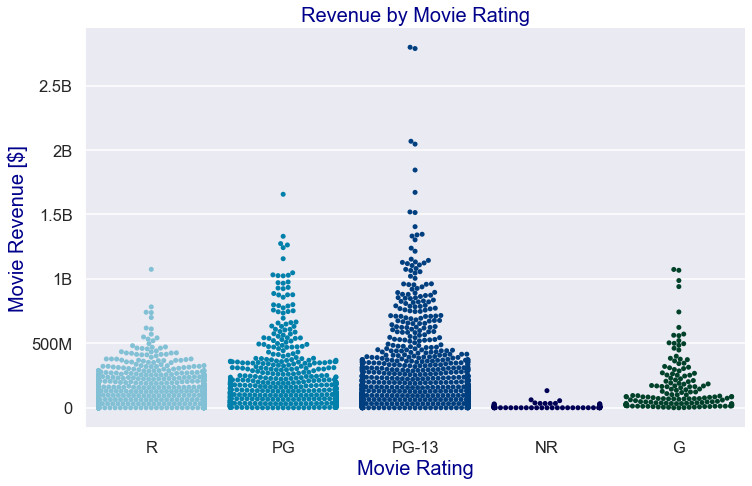

In [152]:
#PLOTTING REVENUE BY MOVIE RATING
sns.catplot(x="rating", y="movie_revenue", kind="swarm", data=filtered_rating_df,height=7, aspect=1.5,palette = ('ocean_r'))
sns.set_context('talk')
plt.title('Revenue by Movie Rating',fontsize=20, color = 'darkblue')
plt.ylabel('Movie Revenue [$]',fontsize=20, color = 'darkblue')
plt.xlabel('Movie Rating',fontsize=20, color = 'darkblue')
ax = plt.gca()
ax.yaxis.set_major_formatter(tick.FuncFormatter(reformat_large_tick_values))
plt.show()

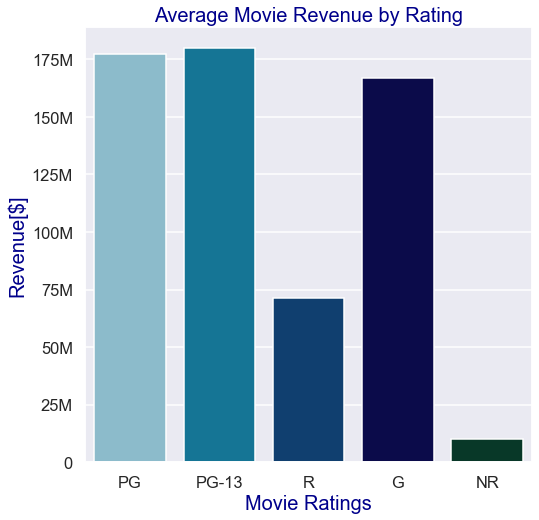

In [145]:
#GITTING AVERAGE MOVIE REVENUE PER MOVIE RATING
PG_df = df[(df['rating'] == 'PG')]
PG_mean_rev = round(PG_df['movie_revenue'].mean(),0)
R_df = df[(df['rating'] == 'R')]
R_mean_rev = round(R_df['movie_revenue'].mean(),0)
G_df = df[(df['rating'] == 'G')]
G_mean_rev = round(G_df['movie_revenue'].mean(),0)
PG_13_df = df[(df['rating'] == 'PG-13')]
PG_13_mean_rev = round(PG_13_df['movie_revenue'].mean(),0)
NR_df = df[(df['rating'] == 'NR')]
NR_mean_rev = round(NR_df['movie_revenue'].mean(),0)

#CREATING A LIST TO GRAPH
rating_list = ['PG','PG-13','R','G','NR']
mean_rev_list = [PG_mean_rev,PG_13_mean_rev,R_mean_rev,G_mean_rev,NR_mean_rev]

#GRAPHING AVERAGE MOVIE REVENUE BY RATING
plt.figure(figsize = (8,8))
sns.set_context('talk')
barplot = sns.barplot(x=rating_list,y=mean_rev_list,palette = ('ocean_r'))

plt.title('Average Movie Revenue by Rating',y=1, fontsize=20, color = 'darkblue')
plt.ylabel('Revenue[$]',fontsize = 20,color = 'darkblue')
plt.xlabel('Movie Ratings',fontsize = 20,color = 'darkblue')

ax = plt.gca()
ax.yaxis.set_major_formatter(tick.FuncFormatter(reformat_large_tick_values))

plt.show()

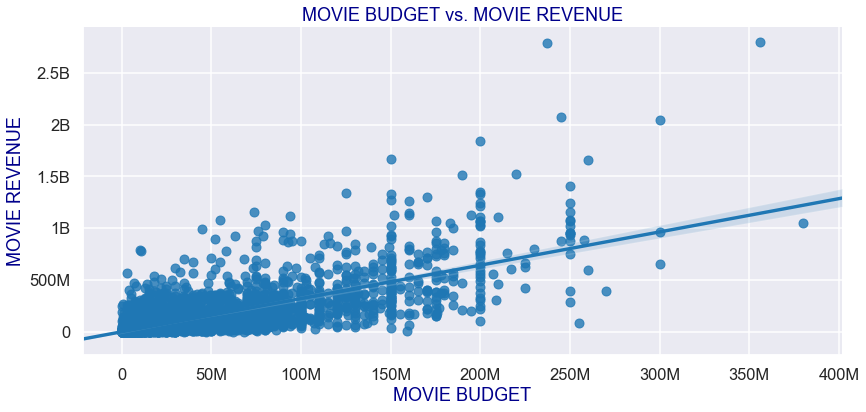

In [150]:
#GRAPHING MOVIE BUDGET VS MOVIE REVENUE
fig_1 = sns.lmplot(x="movie_budget", y="movie_revenue",fit_reg = True, data=df, height=6, aspect=2)
plt.title('MOVIE BUDGET vs. MOVIE REVENUE',fontsize=18, color = 'darkblue')
plt.ylabel('MOVIE REVENUE',fontsize=18, color = 'darkblue')
plt.xlabel('MOVIE BUDGET',fontsize=18, color = 'darkblue')

ax = plt.gca()
ax.yaxis.set_major_formatter(tick.FuncFormatter(reformat_large_tick_values))
ax.xaxis.set_major_formatter(tick.FuncFormatter(reformat_large_tick_values))
plt.show()

In [32]:
#GROUPING MOVIE USER SCORES BY 10's
df['user_score_tens'] = df.user_score // 10 * 10

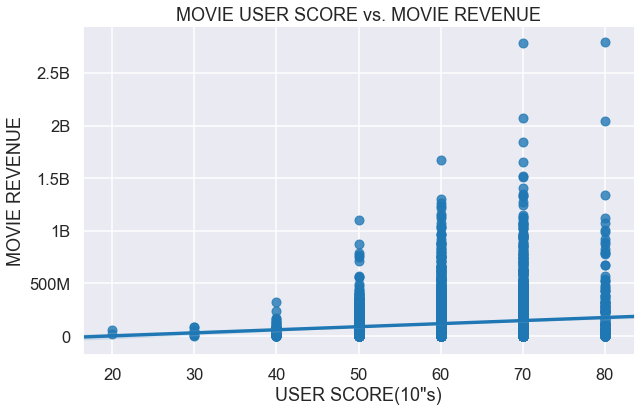

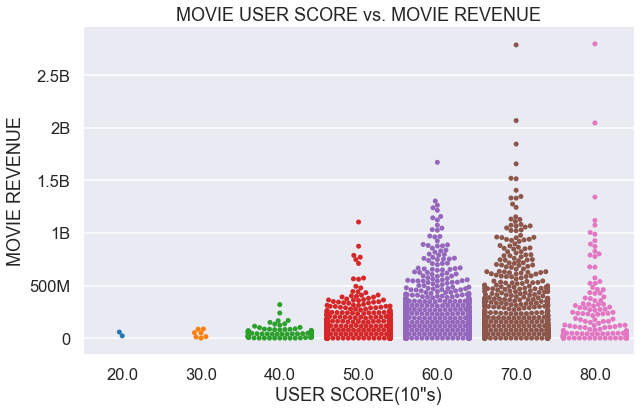

In [151]:
#GRAPHING MOVIE USER SCORE vs. MOVIE REVENUE
sns.set_style('darkgrid')
sns.lmplot(x="user_score_tens", y="movie_revenue", data=df,height=6, aspect=1.5, palette = ('ocean')).set(
    title='MOVIE USER SCORE vs. MOVIE REVENUE', ylabel='MOVIE REVENUE',xlabel=('USER SCORE(10"s)'))
sns.set_style('darkgrid')
ax = plt.gca()
ax.yaxis.set_major_formatter(tick.FuncFormatter(reformat_large_tick_values))

sns.catplot(x="user_score_tens", y="movie_revenue", kind="swarm", data=df,height=6, aspect=1.5).set(
    title='MOVIE USER SCORE vs. MOVIE REVENUE', ylabel='MOVIE REVENUE',xlabel=('USER SCORE(10"s)'))
sns.set_context('talk')
ax = plt.gca()
ax.yaxis.set_major_formatter(tick.FuncFormatter(reformat_large_tick_values))
plt.show()


In [34]:
df.corr()[['movie_budget', 'user_score','movie_revenue']]

,movie_budget,user_score,movie_revenue
run_time,0.253689,0.277455,0.249066
user_score,-0.071166,1.000000,0.136743
movie_budget,1.000000,-0.071166,0.719274
movie_revenue,0.719274,0.136743,1.000000
user_score_tens,-0.072093,0.946317,0.126495


In [35]:
tick_list = []
for i in range(1,10):
    tick_list.append(round(df['movie_budget'].max() * (i/10),0))
    

In [36]:
tick_list

[38000000.0,
 76000000.0,
 114000000.0,
 152000000.0,
 190000000.0,
 228000000.0,
 266000000.0,
 304000000.0,
 342000000.0]

In [37]:
df[df['movie_revenue']>=2797800564]

,title,release_date,genre,run_time,rating,user_score,original_language,movie_budget,movie_revenue,keywords,actors,director_list,user_score_tens
70,Avengers: Endgame,04/26/2019,"['Adventure', 'Science Fiction', 'Action']",181,PG-13,83.0,English,356000000.0,2.797801e+09,"['space travel', 'time travel', 'time machine'...","['Robert Downey Jr.', 'Chris Evans', 'Mark Ruf...","['Anthony Russo', 'Joe Russo']",80.0


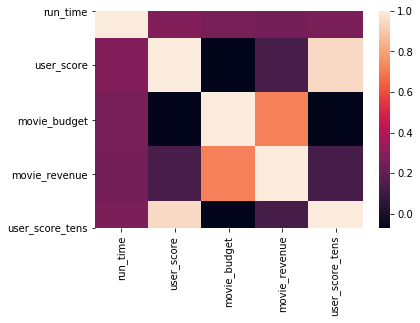

In [150]:
corr = df.corr()
 
# Heatmap
sns.heatmap(corr)

In [155]:
df['genre'].str.contains('Comedy')

0        True
1       False
2       False
3       False
4       False
        ...  
5812     True
5813    False
5814     True
5815    False
5816    False
Name: genre, Length: 5817, dtype: bool

In [198]:
most_common_genre_list = ['Comedy','Drama','Romance','Science Fiction','Crime','Action','Horror',
                          'Thriller','Fantasy','Animation','Mystery','War']
genre_dict = {}
    
for genre in most_common_genre_list:
    genre_dict[genre] = []
    for index,bol in enumerate(df['genre'].str.contains(genre)):
        if bol == True:
            if df['movie_revenue'][index] > 0:      
                genre_dict[genre].append(df['movie_revenue'][index])



In [217]:
genre_dict_avg = {}
for genre in most_common_genre_list:
    genre_dict_avg[genre] = []
    avg = round(sum(genre_dict[genre])/len(genre_dict[genre]),0)
    genre_dict_avg[genre].append(avg)
avg_df = pd.DataFrame(genre_dict_avg).transpose()
avg_df.reset_index(inplace=True)
avg_df.columns = (['Genre','Revenue_Average'])
avg_df

,Genre,Revenue_Average
0,Comedy,116516845.0
1,Drama,80442956.0
2,Romance,98865346.0
3,Science Fiction,200487344.0
4,Crime,85998819.0
5,Action,193151000.0
6,Horror,64732908.0
7,Thriller,97015867.0
8,Fantasy,224436222.0
9,Animation,242393297.0


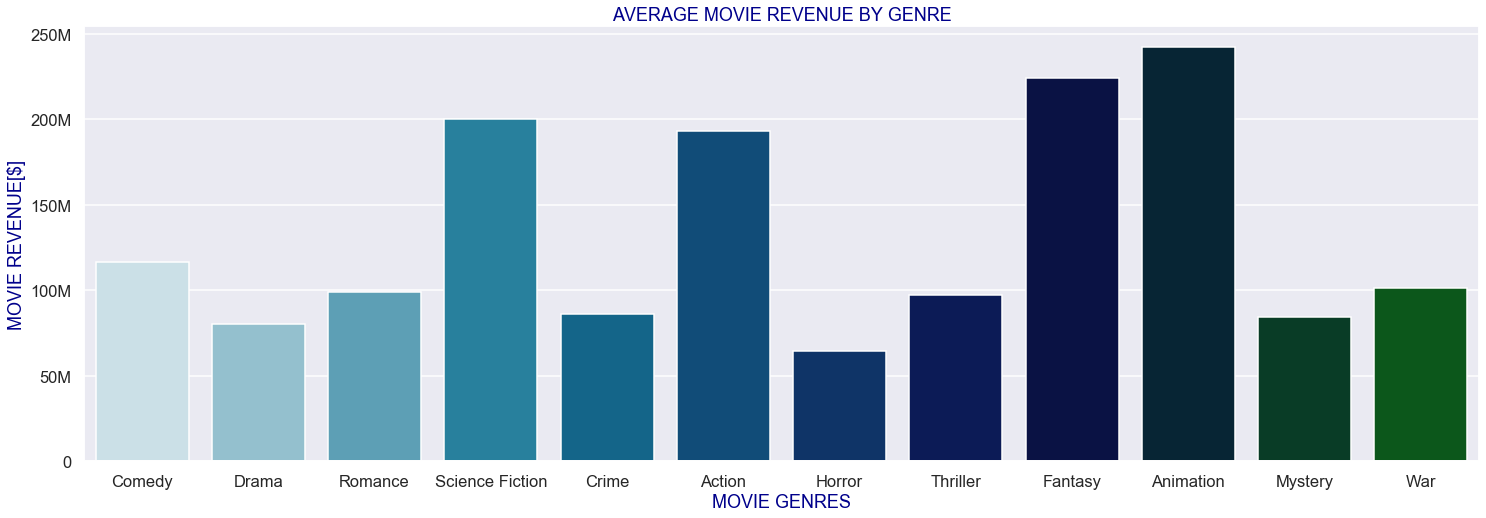

In [233]:
plt.figure(figsize = (25,8))
avg_barplot = sns.barplot(x="Genre", y="Revenue_Average",  data=avg_df,palette = ('ocean_r'))
plt.title('AVERAGE MOVIE REVENUE BY GENRE',fontsize=18, color = 'darkblue')
plt.ylabel('MOVIE REVENUE[$]',fontsize=18, color = 'darkblue')
plt.xlabel('MOVIE GENRES',fontsize=18, color = 'darkblue')
ax = plt.gca()
ax.yaxis.set_major_formatter(tick.FuncFormatter(reformat_large_tick_values))
plt.show()